In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [11]:
data = pd.read_csv("Country-data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [13]:
sum(data.duplicated(subset = 'country'))

0

In [14]:
data.drop('country',axis=1,inplace=True)
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [19]:
num_attrs = [item for item in data.columns if data[item].dtype != "O"]
cat_attrs = [item for item in data.columns if data[item].dtype == "O"]

In [20]:
fullpipeline = ColumnTransformer([
    ('num',StandardScaler(),num_attrs),
    ('cat',OneHotEncoder(),cat_attrs)
])

In [25]:
K = range(1, 10)
distortions = []
inertias = []
map1 = {}
map2 = {}


for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(data)
	kmeanModel.fit(data)

	distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / data.shape[0])
	inertias.append(kmeanModel.inertia_)

	map1[k] = sum(np.min(cdist(data, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / data.shape[0]
	map2[k] = kmeanModel.inertia_

In [26]:
for key, val in map1.items():
	print(f'{key} : {val}')

1 : 19671.38597380213
2 : 10505.528626965714
3 : 8957.445452007709
4 : 7090.875125861968
5 : 5454.012303712617
6 : 4823.43686768195
7 : 4431.3170407585385
8 : 4190.410572727076
9 : 3380.569579573733


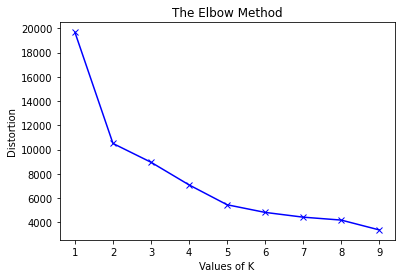

In [27]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

In [28]:
kmodel = KMeans(n_clusters=2)
kmodel.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
some_data = data.iloc[:15]
some_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [30]:
print('Predictions : ',kmodel.predict(some_data))

Predictions :  [0 0 0 0 0 0 0 1 1 0 0 1 0 0 0]
